# Chaotic model divergence: an ensemble of Lorenz 96 models using basic model interface (BMI)
The Lorenz 96 model is a model often used to demonstrate chaotic behavior and it is the de-facto standard benchmark model used in the field of data assimilation to test data assimilation methods. In this notebook I present how to easily interact with an implementation of the Lorenz 96 model through the Basic Model Interface (BMI). I show to run a complete ensemble of model-instances that illustrates the chaotic nature of the model.

## the Lorenz 96 model
The Lorenz 96 model is a dynamical sytem for $i=1,...,N$ defined by
\begin{equation}
\frac{dx_{i}}{dt}=\left(x_{i+1} - x_{i-2}\right)x_{i-1} - x_{i} + F
\end{equation}
where i is cyclical, ie. $x_{0}=x_{N}$ and $x_{-1} = x_{N-1}$. $F$ is an external force acting on the system. A value of $F=8$ is known to create chaotic bahavior and is often used. The dimension $N$ can be freely chosen and is typical $40$, but for testing very high dimension systems, higher values can be used. The Lorenz 96 model is a typical chaotic model where, although, the model is deterministic, slight variations in the input state will over time result in complete different states.

## Numerical implementation of the Lorenz 96 model
A fourth order Runga Kutta scheme is used to implement the Lorenz 96 model. Writing the entire state-vector as $\vec{x}$ and using $f\left(\vec{x}\right)$ as the right hand side of the model, ie:
\begin{eqnarray}
f\left(x_{i}\right) = \left(x_{i+1} - x_{i-2}\right)x_{i-1} - x_{i} + F
\\
f\left(\vec{x}\right) = \left\{f\left(x_{1}\right),...,f\left(x_{N}\right)\right\}
\end{eqnarray}
the implementation is given by:
\begin{eqnarray}
\vec{k}_{1}=f\left(\vec{x}\left(t\right)\right)
\\
\vec{k}_{2}=f\left(\vec{x}\left(t\right) + \frac{1}{2}\vec{k}_{1}\Delta t\right)
\\
\vec{k}_{3}=f\left(\vec{x}\left(t\right) + \frac{1}{2}\vec{k}_{2}\Delta t\right)
\\
\vec{k}_{4}=f\left(\vec{x}\left(t\right) + \vec{k}_{3}\Delta t\right)
\end{eqnarray}
and finally
\begin{equation}
\vec{x}\left(t + \Delta t\right) = \vec{x}\left(t\right) + \frac{1}{6}\left(\vec{k}_{1} + 2\vec{k}_{2} + 2 \vec{k}_{3} + \vec{k}_{4}\right)
\end{equation}

## The Basic Model Interface (BMI)
The basic model interface allows communicating with models in a generic fashion. It requires a few standard methods to be available such as 'initialize()' and 'update()'. Methods that are not relevant for the model need still be implemented, but can simply raise a one line exception. See [ref] for more information. Implementing the BMI allows easy interaction with the model. The cells below initiate one instance of the model. For reasons that will become clear we will call this instance "truthModel".

In [1]:
#required libraries and settings
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import BMILorenz

In [ ]:
#create an instance of the BMILorenz class
truthModel = BMILorenz.BMILorenz ()

#initialize the model 
##TODO add init file to intialize

J = 40 #dimension of Lorenz Model

truthModel.initialize()

Each model has a list of variable that can be set or read

In [13]:
truthModel.get_input_var_names()

['state']

here we set the initial value of the state

In [ ]:
commonStartState = np.zeros(J)
truthModel.set_value('state',commonStartState)

In [2]:
N = 25 #numeber of ensemble members
J = 40 #dimension of Lorenz Model

plotVar = 2 #number of variable to use for metrics and plotting

In [3]:
#make an ensemble of BMILorenz models
ensemble = []
commonStartState = np.zeros(J)
commonStartState[19]=0.01
for n in range (N):
    ensemble.append(BMILorenz.BMILorenz ())
    ensemble[n].initialize()
    startState = commonStartState
    startState[5] = startState [5] + np.random.randn(1)*0.01;
    ensemble[n].set_value('state',startState)
    
#end a truth
truthModel = BMILorenz.BMILorenz ()
truthModel.initialize()
truthModel.set_value('state',commonStartState)
    

In [4]:
#run while keeping output
outputLength = int((truthModel.get_end_time() - truthModel.get_start_time()) / truthModel.get_time_step())

ensembleOutput = np.zeros([outputLength,N])
timeSeries = np.zeros([outputLength])
truth = np.zeros([outputLength])

timeCounter = 0

while truthModel.get_current_time()<truthModel.get_end_time():
    
    truthModel.update()
    truth[timeCounter] = truthModel.get_value_at_indices('state',5)
    
    timeSeries[timeCounter] = truthModel.get_current_time()
    
    
    for n in range (N):
        ensemble[n].update()
        ensembleOutput[timeCounter,n] = ensemble[n].get_value_at_indices('state',5)
        
    timeCounter = timeCounter + 1
    


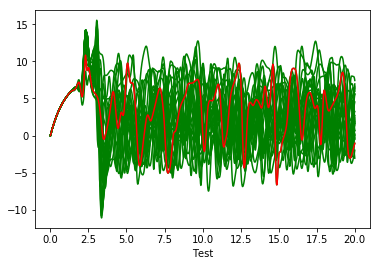

In [12]:
plt.plot(timeSeries,ensembleOutput,'g',timeSeries,truth,'r')
plt.xlabel('Test')
plt.show()